# 2 Machine Learning Models

## 2.1 Simple Linear Regression

This notebook runs a simple linear regression model from the SciKit Learn python library (https://scikit-learn.org/stable/user_guide.html).

The problem posed is to predict electricity consumption at a local (LSOA) level, the data is therefore continuous and numerical and is labelled. This lends to supervised machine learning (ML) and regression models.

It is hypothesised that there will be a correlation between mean house price sales (as an indicator of general prosperity and condition of a property) and electricity consumption. This data has previously been cleaned, is read in and split into training and test data. Results are printed in line and exported to csv for comparison against other regression models.

Prior to running a model using house price sales as a predictor / feature variable, a linear regression model is run on the basic electricity consumption data using 'Year' as the sole feature variable. This is not expected to predict well but is useful to run to set the baseline from which all models and additions or changes of feature variables can be evaluated.

## 2.1.1 Import Model Libraries

Data handling and scientific libraries used include:

numpy - (scientific numerical package for Python that enables working with arrays) pandas - (data analysis library) matplotlib - (enables plotting and visualisation in Python) openpyxl / load_workbook (opens Excel xlsx files)

In [1]:
#Import Libraries

In [2]:
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
from openpyxl import load_workbook

Imports the linear model from the SciKit Learn library.

In [3]:
#Import ML models

In [4]:
from sklearn import linear_model

#from sklearn.model_selection import train_test_split
#from sklearn.linear_model import LinearRegression
#from sklearn.linear_model import Lasso
#from sklearn.linear_model import Ridge
#from sklearn.linear_model import ElasticNet
#from sklearn.linear_model import HuberRegressor
#from sklearn.linear_model import Lars
#from sklearn.linear_model import LassoLars
#from sklearn.linear_model import PassiveAggressiveRegressor
#from sklearn.linear_model import RANSACRegressor
#from sklearn.linear_model import SGDRegressor
#from sklearn.svm import SVR
#from sklearn.tree import DecisionTreeRegressor
#from sklearn.ensemble import RandomForestRegressor
#from sklearn.ensemble import AdaBoostRegressor
#from sklearn.neural_network import MLPRegressor
#from sklearn.neighbors import KNeighborsRegressor


Imports the standard error metric functions of Variance (explained variance), MAE, MSE and R2 from the SciKit Learn library. 

Explained variance is an indicator of whether the model is accounting for the variance in the dataset.

MAE - is the real error averaged across the predicted values.

MSE - is the square of the mean error, which indicates risk and the quality of the prediction. Values closer to zero are better.

R squared or R2 'represents the proportion of variance (of y) that has been explained by the independent variables in the model. It provides an indication of goodness of fit and therefore a measure of how well unseen samples are likely to be predicted by the model, through the proportion of explained variance.'1
An R2 value closer to 1 indicates a good fit.

1 - https://scikit-learn.org/stable/modules/model_evaluation.html#regression-metrics

In [5]:
#Import Error Metrics

In [6]:
from sklearn.metrics import explained_variance_score
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

In [7]:
#Import Test/Train split function

In [8]:
from sklearn.model_selection import train_test_split

## 2.1.2 Import Data & Split into Train/Test Data

The train_test_split function allows you to defined test_size and train_size, if one isn't specified it is set as the complementary value.

A training size of 0.75-0.8 is generally recommended. Sensitivity testing to the training size showed continuous improvement with a larger training size. Beyond 80% of the data for training may lead to overfitting hence selection at this point.

Defining the random_state with an integer allows repetition across different Notebooks/model runs.

In [9]:
#Read in datafile

In [10]:
df_LSOA_EnergyConsumption_ResPropertySales = pd.read_csv('1_DataCleaning/LSOAEnergyConsumption_ResPropertySales.csv')

In [11]:
#Split df_LSOA_EnergyConsumption_ResPropertySales dataset 80:20

In [12]:
train, test = train_test_split(df_LSOA_EnergyConsumption_ResPropertySales, test_size=0.2, train_size=0.8, random_state=10)

In [13]:
#Using a mask does the same thing but has fewer parameters than the train_test_split function in SciKit Learn

In [14]:
#msk = np.random.rand(len(df_LSOA_EnergyConsumption_ResPropertySales)) < 0.8

In [15]:
#train = df_LSOA_EnergyConsumption_ResPropertySales[msk]
#test = df_LSOA_EnergyConsumption_ResPropertySales[~msk]

## 2.1.3 Model Set-up & Training

The linear model is defined, as well as the training feature variables to be passed to the machine learning model.

In this instance only 'Year' is selected as a feature variable to predict 'Mean_domestic_electricity_consumption_kWh_per_meter'.

The model is trained using .fit and the training data plotted on a simple scatter plot for visualisation. Given the variability of electricity consumption within a year and no strong correlation when looking at data covering all LSOAs across the UK this model is not expected to predict well, but will be used as a bench mark for evaluating further models and feature variables.

In [16]:
#sklearn simple linear regression model - Consumption against Year

In [17]:
regr = linear_model.LinearRegression()

In [18]:
train_x = np.asanyarray(train[['Year']])
train_y = np.asanyarray(train[['Mean_domestic_electricity_consumption_kWh_per_meter']])

In [19]:
regr.fit(train_x, train_y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [20]:
print ('Coefficients: ', regr.coef_)
print ('Intercept: ',regr.intercept_)

Coefficients:  [[-58.66925346]]
Intercept:  [122083.99266176]


Text(0,0.5,'Mean Consumption (per meter) (kWh)')

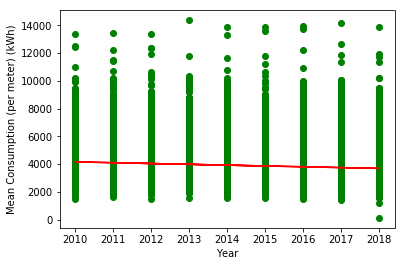

In [21]:
plt.scatter(train.Year, train.Mean_domestic_electricity_consumption_kWh_per_meter,  color='green')
plt.plot(train_x, regr.coef_[0][0]*train_x + regr.intercept_[0], '-r')
plt.xlabel("Year")
plt.ylabel("Mean Consumption (per meter) (kWh)")

## 2.1.4 Model Evaluation

The metrics defined above are used to evaluate the model performance, as expected the model does not perform well.

In [22]:
test_x = np.asanyarray(test[['Year']])
test_y = np.asanyarray(test[['Mean_domestic_electricity_consumption_kWh_per_meter']])
test_y_ = regr.predict(test_x)

print("Explained Variance Score: %.2f" % explained_variance_score(test_y , test_y_) )
print("MAE: %.2f" % mean_absolute_error(test_y , test_y_) )
print("MSE: %.2f" % mean_squared_error(test_y , test_y_) )
print("R2-score: %.2f" % r2_score(test_y , test_y_) )


#print("Mean absolute error: %.2f" % np.mean(np.absolute(test_y_ - test_y)))
#print("Residual sum of squares (MSE): %.2f" % np.mean((test_y_ - test_y) ** 2))

Explained Variance Score: 0.03
MAE: 608.63
MSE: 742005.50
R2-score: 0.03


Explained Variance - is very low, doesn't deal well with the variance in the model.

MAE - the MAE is 15% of the mean of the consumption dataset, which would not be considered accurate enough for industry use. Although in this instance as the measure of fitness and quality of prediction are also very low these collectively indicate the model is not reliable.

MSE - is very high, reflecting a high risk of a low quality prediction.

R2 - is very low / close to zero demonstrating the model has poor 'fit' and doesn't deal well with the variance in the model.

## 2.1.5 Model Set-up & Training - Mean Price Feature Variable

The linear model is defined, as well as the training feature variables to be passed to the machine learning model.

In this instance only 'Mean Price Paid' is selected as a feature variable to predict 'Mean_domestic_electricity_consumption_kWh_per_meter'.

The model is trained using .fit and the training data plotted on a simple scatter plot for visualisation. 

This model is expected to predict with a better fit relatively than when 'Year' was taken as the sole feature variable as  plotting of the data shows a (weak) positive correlation. However, it is not expected that a linear model with a single feature variable will perform well. 

In [23]:
#sklearn simple linear regression model - Consumption against Mean house price

In [24]:
regr = linear_model.LinearRegression()

In [25]:
train_x_2 = np.asanyarray(train[['Mean_price_paid']])
train_y_2 = np.asanyarray(train[['Mean_domestic_electricity_consumption_kWh_per_meter']])

In [26]:
regr.fit (train_x_2, train_y_2)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [27]:
print ('Coefficients: ', regr.coef_)
print ('Intercept: ',regr.intercept_)

Coefficients:  [[0.00166506]]
Intercept:  [3521.12300408]


Text(0,0.5,'Mean Consumption (per meter) (kWh)')

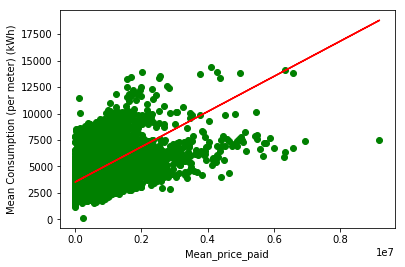

In [28]:
plt.scatter(train.Mean_price_paid, train.Mean_domestic_electricity_consumption_kWh_per_meter,  color='green')
plt.plot(train_x_2, regr.coef_[0][0]*train_x_2 + regr.intercept_[0], '-r')
plt.xlabel("Mean_price_paid")
plt.ylabel("Mean Consumption (per meter) (kWh)")

## 2.1.6 Model Evaluation - Mean Price Feature Variable

In [29]:
test_x_2 = np.asanyarray(test[['Mean_price_paid']])
test_y_2 = np.asanyarray(test[['Mean_domestic_electricity_consumption_kWh_per_meter']])
test_y_2_ = regr.predict(test_x_2)

print("Explained Variance Score: %.2f" % explained_variance_score(test_y_2 , test_y_2_) )
print("MAE: %.2f" % mean_absolute_error(test_y_2 , test_y_2_) )
print("MSE: %.2f" % mean_squared_error(test_y_2 , test_y_2_) )
print("R2-score: %.2f" % r2_score(test_y_2 , test_y_2_) )

Explained Variance Score: 0.15
MAE: 564.94
MSE: 647511.20
R2-score: 0.15


Explained Variance - is still low, showing that the model doesn't deal well with the variance in the model.

MAE - the MAE is improved but still high, which would not be considered accurate enough for industry use. Although in this instance as the measure of fitness and quality of prediction are also very low these collectively indicate the model is not reliable.

MSE - is very high, reflecting a high risk of a low quality prediction.

R2 - is very low / close to zero demonstrating the model has poor 'fit' and doesn't deal well with the variance in the model.

## 2.1.7 Results Export

In [102]:
#Set up dataframe for results

In [115]:
df_Results = None

In [116]:
#Print results to the dataframe

In [117]:
df_Results = pd.DataFrame({'Explained Variance Score': [explained_variance_score(test_y , test_y_), explained_variance_score(test_y_2 , test_y_2_)]},
                  index=['SimpleLinear_Year', 'SimpleLinear_Price'])

In [118]:
df_Results.insert(1,'MAE', [mean_absolute_error(test_y , test_y_), mean_absolute_error(test_y_2 , test_y_2_)])

In [119]:
df_Results.insert(2, 'MSE', [mean_squared_error(test_y , test_y_), mean_squared_error(test_y_2 , test_y_2_)])

In [120]:
df_Results.insert(3,'R2-score', [r2_score(test_y , test_y_), r2_score(test_y_2 , test_y_2_)])

In [126]:
df_Results.insert(0, 'Model', 'Simple Linear')

In [127]:
df_Results.insert(1, 'Feature Variables', ['Year', 'Price'])

In [128]:
#Check dataframe 

In [129]:
df_Results.head()

,Model,Feature Variables,Explained Variance Score,MAE,MSE,R2-score
SimpleLinear_Year,Simple Linear,Year,0.030716,608.629485,742005.500563,0.030710
SimpleLinear_Price,Simple Linear,Price,0.154156,564.938189,647511.200503,0.154149


In [130]:
#Export results to csv

In [131]:
df_Results.to_csv('2_ModelResults/SimpleLinear_Results.csv')

In [114]:
#END